<a href="https://colab.research.google.com/github/kanjamwingirwa/Week9_Independent_Project/blob/main/Titanic_Classification_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**
The titanic data set is a popular one in the data scence field. In this exercise, we aim to use KNN to determine one's chances of survivng the infamous tragedy.

**Defining the Metric for Success**
A model of at least 80% accuracy. Compare the different models and use different partitions. 

**Understanding the Context**
Many of the people who survived from the titanic were over a certain age and paid more money than those who didn't. In addition, there is a strong correlation btwn survival and the cabin class that one was in. 

**Recording the Experimental Design**

The steps taken in this process are

1. Data cleaning and preparation

2. Exploratory Data Analysis:MultiVariate and Bivariate Analysis

3. Modelling: KNN

Conclusions

In [ ]:
#load the most basic libraries for reading and loading data
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
titanic = pd.read_csv('train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#look at the tail as well
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Determining the number of rows and columns in our dataset
#
print('This dataset has',titanic.shape[0],'rows and',titanic.shape[1],'columns')

This dataset has 891 rows and 12 columns


In [ ]:
# Identifying the Missing Data
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The column age also has too many missing values but we cannot delete it, instead, we have to fill with the mean depending on other factors especially the class variable. 

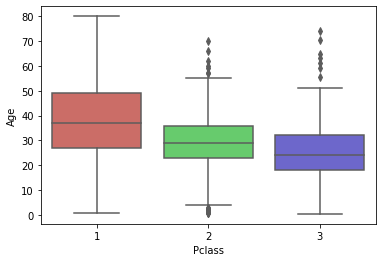

In [ ]:
# Imputing missing values
# ---
# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sb.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

From the above, it seems that pclass 3 has the youngest people. We can therefore, use the pclass to fill the empty values that we do not have.The average age is pclass 1 is about 36, pclass2 is roughly 28 and pclass is about 25

In [ ]:
#we write a function which assigns age according to the mean age of the people in that pclass
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 36
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age

In [ ]:
# We apply the function 
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#deleting the cabin column
#let's drop the Cabin column since it has too many NaN vaues
titanicdf=titanic.drop(['Cabin'], axis=1)
titanicdf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#we also delete the 'name', 'ticket', 'passengerid' 
titanicdf=titanicdf.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
titanicdf.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#there are still 2 missing values in embarked which we wil also delete. 
titanicdf.dropna(inplace=True)
titanicdf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


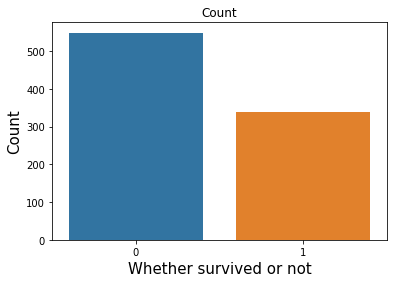

In [ ]:
#lets determine the percentage of survivors vs non survivors
sns.countplot('Survived', data = titanicdf)
plt.xlabel('Whether survived or not', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count')
plt.show()

More people died than those who survived

In [ ]:
titanicdf.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#let's label encode the gender column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
categ= ['Sex', 'Embarked']
le = LabelEncoder()
titanicdf[categ] = titanicdf[categ].apply(le.fit_transform)

In [ ]:
titanicdf.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

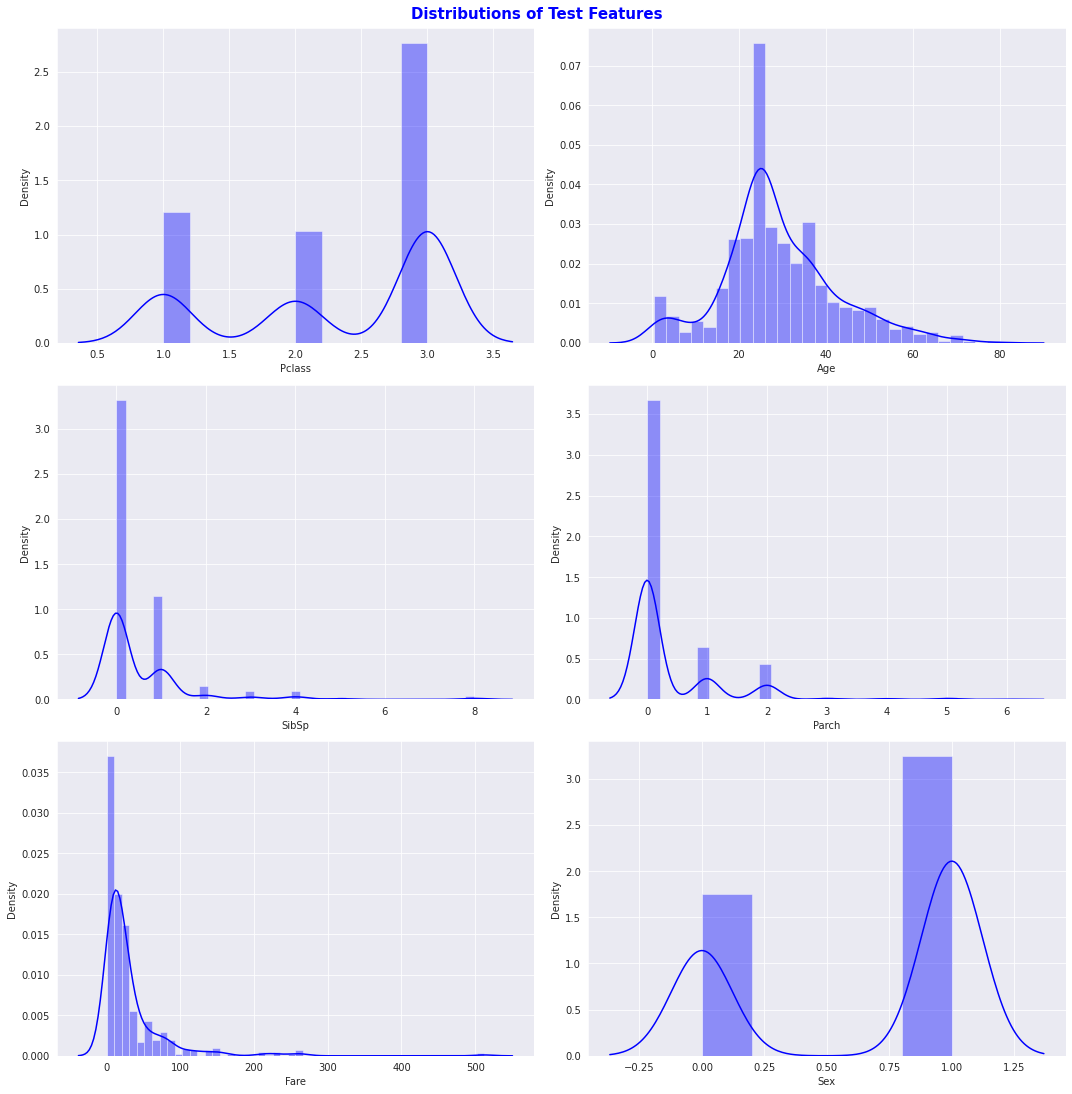

In [ ]:
# Histograms of the columns

# First we create an array of the columns
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (15, 15))
fig.suptitle('Distributions of Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')
for ax, data, name in zip(axes.flatten(), titanicdf, columns):
  sb.distplot(titanicdf[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

From the above we can deduce that;

1. Most of the passengers got into pclass 3. 

2. Age was normally distributed and the a huge percentage of the passengers were in their mid twenties 

3. There were some extreme disparities in the fares paid. However, most people paid very little which makes sense since many of the passengers were in the cheapest class. 

4. There were more men than women on the Titanic.

Bivariate Analysis

In [ ]:
# Let's display the correlations between the variables
corr = titanicdf.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.055919,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.393755,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.084607,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.055919,-0.393755,0.084607,1.000000,-0.241165,-0.171690,0.116536,-0.016365
SibSp,-0.034040,0.081656,-0.116348,-0.241165,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.171690,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.116536,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.016365,0.068900,0.040449,-0.226311,1.000000


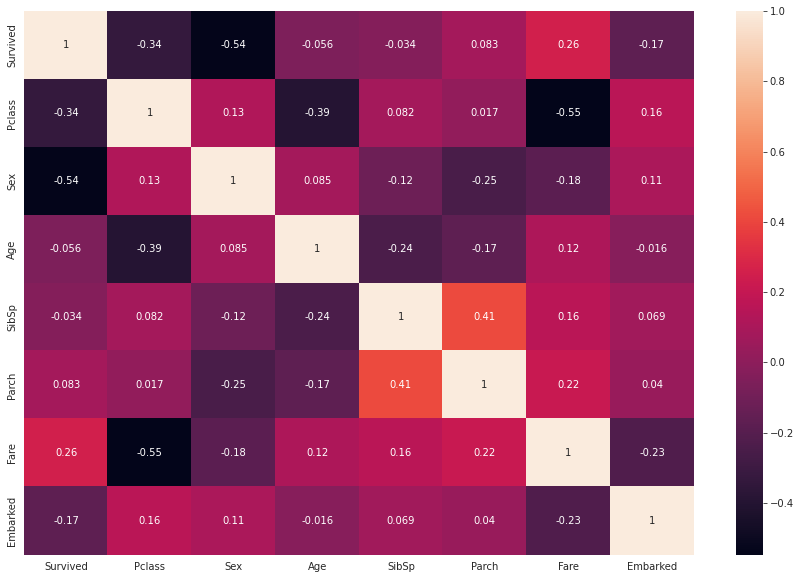

In [ ]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

From the above, we can tell that;

1. Fare and survival had a high positive correlation 
2. Subsp and parch were also highly related postively. 
3. Sex and survival seemed to have a very low correlation and it was actually negative. 

In [ ]:
#I want to see how each of these variables relates with the target variable
titanicdf.drop("Survived", axis=1).apply(lambda x: x.corr(titanicdf.Survived))

Pclass     -0.335549
Sex        -0.541585
Age        -0.055919
SibSp      -0.034040
Parch       0.083151
Fare        0.255290
Embarked   -0.169718
dtype: float64

From the above we can deduce that  parch and fare were the two variables that had the greatest effect on whether a passenger survived or not. 

# **Modelling: KNN**

In [55]:
test= pd.read_csv('test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test= test.drop(['Name', 'Cabin'], axis =1)
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Q
1,893,3,female,47.0,1,0,363272,7.0000,S
2,894,2,male,62.0,0,0,240276,9.6875,Q
3,895,3,male,27.0,0,0,315154,8.6625,S
4,896,3,female,22.0,1,1,3101298,12.2875,S


In [64]:
#let's label encode the gender column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
categ= ['Sex', 'Embarked']
le = LabelEncoder()
test[categ] = test[categ].apply(le.fit_transform)

In [66]:
test= test.drop(['PassengerId', 'Ticket'], axis =1)
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [68]:
test.dropna(inplace=True)
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
#Train the model without optimization
#split data
X = titanicdf.drop(['Survived'],1)
y = titanicdf['Survived']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [ ]:
#let us scale our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#predict using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#let's evaluate our algorith
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print('accuracy score',metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score 0.7134831460674157
[[84 21]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



In [ ]:
#Train the model without optimization
#split data
X = titanicdf.drop(['Survived'],1)
y = titanicdf['Survived']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
#let us scale our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#predict using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#let's evaluate our algorith
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
print('accuracy score',metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score 0.7640449438202247
[[132  25]
 [ 38  72]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       157
           1       0.74      0.65      0.70       110

    accuracy                           0.76       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [70]:
#Train the model without optimization
#split data
X = titanicdf.drop(['Survived'],1)
y = titanicdf['Survived']

#train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.6,random_state=0)
#let us scale our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = test
#predict using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#let's evaluate our algorith
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#print('accuracy score',metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

The 60-40 split seems to produce the best accuracy score. 

In [ ]:
#let's perform some LDA to optimize our model 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy score',metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy score 0.7724719101123596
[[186  30]
 [ 51  89]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       216
           1       0.75      0.64      0.69       140

    accuracy                           0.77       356
   macro avg       0.77      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



The model performs worse after LDA. 

Conclusions

The data set is adequate for our modelling. Perhaps, more should have been done in the preprocessing stage in order to make it more palatable for use. 